# Probni prvi kolokvij

## Nakić 1

Pomoću for petlji napišite ekvivalent donjeg koda
```py
q = [r**2 for r in [10**i for i in range(5)]]
```

In [1]:
unutarnja = [10**i for i in range(5)]
q = [r**2 for r in unutarnja]

In [1]:
unutarnja = []
for i in range(5):
    unutarnja.append(10**i)
q = []
for r in unutarnja:
    q.append(r**2)

In [2]:
q

[1, 100, 10000, 1000000, 100000000]

In [3]:
q = []
for i in range(5):
    r = 10**i
    q.append(r**2)

In [5]:
q = []
for i in range(0, 10, 2): q.append(10**i)

In [6]:
q

[1, 100, 10000, 1000000, 100000000]

In [5]:
skup = {broj + 5 for broj in range(5, 99, 7) if broj % 3 == 1}

In [6]:
skup

{24, 45, 66, 87}

In [7]:
skup = set()
for broj in range(5, 99, 7):
    if broj % 3 == 1:
        skup.add(broj + 5)

In [8]:
skup

{24, 45, 66, 87}

In [9]:
rječnik = {ime: len(ime) for ime in 'Borna Ivka Mare Silvana'.split()}

In [10]:
rječnik

{'Borna': 5, 'Ivka': 4, 'Mare': 4, 'Silvana': 7}

In [11]:
rječnik = {}
for ime in 'Borna Ivka Mare Silvana'.split():
    rječnik[ime] = len(ime)

In [12]:
rječnik

{'Borna': 5, 'Ivka': 4, 'Mare': 4, 'Silvana': 7}

In [13]:
velika = [i + j for i in range(10) for j in range(i) if j % 3 != i % 4]

In [15]:
print(velika)

[1, 2, 3, 3, 4, 5, 5, 6, 5, 7, 8, 6, 7, 9, 10, 7, 8, 9, 10, 11, 12, 13, 9, 10, 12, 13, 15, 9, 11, 12, 14, 15, 17]


In [16]:
velika = []
for i in range(10):
    for j in range(i):
        if j % 3 != i % 4:
            velika.append(i + j)

In [18]:
print(velika)

[1, 2, 3, 3, 4, 5, 5, 6, 5, 7, 8, 6, 7, 9, 10, 7, 8, 9, 10, 11, 12, 13, 9, 10, 12, 13, 15, 9, 11, 12, 14, 15, 17]


## Nakić 2

Napišite funkciju koja za ulaz prima broj $N$. Funkcija treba kreirati slučajan `numpy` niz duljine $N$ s uniformnom distribucijom, zatim treba naći broj $M$ brojeva u nizu koji leže između $0.5$ i $0.6$, te treba vratiti broj $\frac{M}{N}$. Učinite funkciju interaktivnom.

In [13]:
import numpy as np

In [23]:
import numpy as np
def proporcija(N):
    niz = np.random.uniform(size=N)
    M = ((niz > .5) & (niz < .6)).sum()
    return M / N

In [25]:
import ipywidgets
slajder = ipywidgets.IntSlider(min=1, max=100, step=1, value=10)
ipywidgets.interact(proporcija, N=slajder)

interactive(children=(IntSlider(value=10, description='N', min=1), Output()), _dom_classes=('widget-interact',))

<function __main__.proporcija>

## Nakić 3

Riješite sljedeću ODJ koristeći Runge-Kutta metodu četvrtog stupnja
na segmentu $[0,4]$:

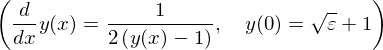

In [51]:
import sympy as sp
sp.init_printing()
y = sp.Function('y')
x = sp.Symbol('x')
epsilon = sp.Symbol('varepsilon')

(sp.Eq(sp.Derivative(y(x),x),1/sp.factor(2*(y(x)-1))),
 sp.Eq(y(0), 1 + sp.sqrt(epsilon)))

Ovdje je $ε=10^{−3}$.

In [28]:
from scipy.integrate import ode

In [29]:
def desna_strana(x, y):
    return 1 / (2*(y-1))

In [30]:
epsilon = 10**-3
jednadžba = ode(desna_strana)
jednadžba.set_integrator('dopri5')
jednadžba.set_initial_value(np.sqrt(epsilon) + 1)
jednadžba.integrate(4)

array([3.00024858])

### Pokušaj provjere

In [31]:
import sympy as sp
sp.init_printing()

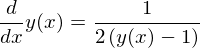

In [38]:
y = sp.Function('y')
x = sp.Symbol('x')
epsilon = sp.Symbol('varepsilon')

jednadžba = sp.Eq(sp.Derivative(y(x),x),1/sp.factor(2*(y(x)-1)))
jednadžba

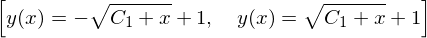

In [45]:
sva_rješenja = sp.dsolve(jednadžba)
sva_rješenja

In [46]:
opće_rj = sva_rješenja[1]
opće_rj

In [47]:
početni = opće_rj.subs({x: 0, y(x): 1 + sp.sqrt(epsilon)})
početni

In [48]:
partikularno = opće_rj.subs(sp.solve(početni)[0])
partikularno

In [39]:
import decimal
decimal.Decimal(10**-3)

Decimal('0.001000000000000000020816681711721685132943093776702880859375')

In [40]:
(10**-3).hex()

'0x1.0624dd2f1a9fcp-10'

In [41]:
10**-3

In [43]:
import sys
sys.float_repr_style

'short'

In [50]:
partikularno.subs({epsilon: sp.S(10)**-3, x: 4}).n(59)

## Nakić 4

Nacrtajte funkciju $v(x)$
za $μ=1$, $μ=0.01$ te $μ=0.001$
na segmentu $[0,1]$ koristeći $10000$ točaka.

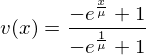

In [58]:
v = sp.Function('v')
mu = sp.Symbol('mu')

definicija = sp.Eq(v(x), (1-sp.E**(x/mu))/(1-sp.E**(1/mu)))
definicija

In [53]:
domena = np.linspace(0, 1, 10_000)

In [54]:
import matplotlib.pyplot as plt
%matplotlib inline

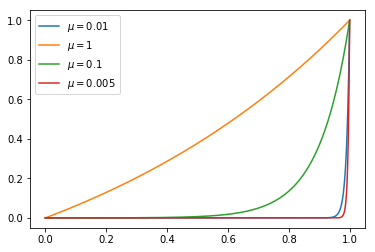

In [57]:
# plt.plot([0, 1, 1], [0, 0, 1], label='$\mu=0.001$')
for mi in 0.01, 1, 0.1, 0.005:
    slika = (1 - np.e ** (domena / mi)) / (1 - np.e ** (1 / mi))
    plt.plot(domena, slika, label=f'$\mu={mi}$')
plt.legend()

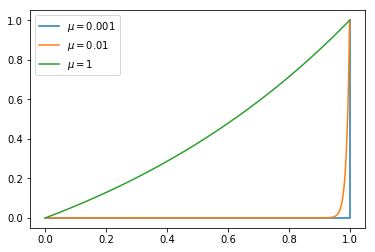

In [77]:
plt.plot([0, 1, 1], [0, 0, 1], label='$\mu=0.001$')
for mi in 0.01, 1:
    slika = (1 - np.e ** (domena / mi)) / (1 - np.e ** (1 / mi))
    plt.plot(domena, slika, label=f'$\mu={mi}$')
plt.legend()

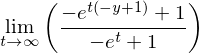

In [76]:
mi = sp.Symbol('mu')
t = sp.Symbol('t')
y = sp.Symbol('y', positive=True)
sp.Limit(definicija.rhs, mi, 0, '+')
sp.Limit(definicija.rhs.subs({1/mi: t, x: 1-y}), t, sp.oo)

## Nakić 5

Pomoću `sympy`ja, izraz `log(x**y*a**b)` pojednostavite do izraza `b*log(a) + y*log(x)`.

In [113]:
import sympy as sp
sp.init_printing()

In [78]:
x, a = sp.symbols('x a', positive=True)
y, b = sp.symbols('y b', real=True)
izraz = sp.log(x**y * a**b)
izraz

In [79]:
sp.expand_log(izraz)

In [82]:
x, y, a, b = sp.symbols('x y a b')
sp.expand_log(sp.log(x**y * a**b), force=True)

## Čačić 1

Što ispisuje sljedeći kod i zašto?

In [129]:
a = b = 5
a += 3
print(b)

a = b = [5]
a += [3]
print(b)

5
[5, 3]


In [91]:
mojalista = [2]
list.__add__(mojalista, [3])
mojalista

## Čačić 2

Simulirajte bacanje pristranog novčića (vjerojatnost glave je 55%) 1000 puta. Kolika je vjerojatnost da u tih 1000 bacanja broj glava bude veći od broja pisama? Rezultat odredite numerički iz simulacije tako da ponovite pokus (svih 1000 bacanja) 100 000 puta.

In [4]:
import numpy as np

In [96]:
broj_bacanja = 1000
broj_pokusa = 100_000
vjerojatnost_glave = .55

pokusi = np.random.uniform(size=(broj_bacanja, broj_pokusa))
glave = pokusi < vjerojatnost_glave

In [97]:
broj_glava = glave.sum(axis=0)
broj_pisama = broj_bacanja - broj_glava
(broj_glava > broj_pisama).mean()

Domaća zadaća: dodajte interaktivnost. :-)
Alternativno: nacrtajte graf ovisnosti o pristranosti novčića.

## Čačić 3

Zadan je sljedeći DataFrame (u datoteci `pdzad.csv`):

In [2]:
%%file pdzad.csv
2016-07-17	450	628.578622	girl	red
2014-02-17	418	226.950670	boy	red
2016-03-03	418	208.042709	girl	red
2014-04-28	26	915.238500	boy	blue
2014-09-07	182	744.946901	boy	green
2014-07-21	345	542.665316	girl	blue
2014-01-21	807	396.394572	boy	yellow
2016-01-23	36	792.745992	boy	blue
2015-07-07	44	616.078044	girl	bluedatum
2014-08-18	390	527.061301	boy	yellow
2014-04-02	456	4.716575	girl	green
2015-12-20	584	577.939367	boy	blue
2015-03-18	718	919.344036	girl	yellow
2015-04-26	792	623.799887	boy	red
2015-08-23	938	927.630485	boy	yellow
2015-09-27	14	40.380074	girl	blue
2014-07-15	26	451.519075	girl	blue
2016-05-15	116	969.555910	boy	red
2015-04-15	209	827.094101	boy	yellow
2014-03-03	202	811.039542	boy	red
2015-01-07	254	512.529009	girl	blue
2015-09-01	2	703.001673	girl	yellow
2016-04-26	667	187.608667	boy	red
2016-01-23	312	884.018403	girl	blue
2014-10-11	792	585.769718	girl	purple
2014-03-30	507	373.570850	girl	yellow
2015-03-27	78	635.718898	girl	purple
2014-12-27	100	41.486492	girl	purple
2016-04-17	683	138.001860	girl	red
2016-03-08	300	925.708079	boy	green
2016-01-16	925	971.141551	boy	red
2016-06-23	317	223.288738	boy	green
2016-01-26	783	819.096804	boy	blue
2015-01-28	71	309.760628	boy	blue
2016-03-27	325	444.532115	boy	purple
2015-07-10	552	517.586297	boy	red
2014-05-19	740	988.004758	boy	yellow
2014-06-07	463	61.233638	boy	green
2016-06-02	518	256.335606	boy	yellow
2014-03-14	528	114.734319	girl	red
2015-06-08	207	731.211508	boy	yellow
2015-10-09	211	715.706315	boy	red
2014-07-08	672	302.847557	boy	yellow
2014-05-06	375	957.917383	girl	yellow
2016-06-09	530	205.990431	girl	purple
2016-09-06	294	682.120222	girl	blue
2015-09-15	166	190.032588	boy	red
2015-01-12	591	978.913511	boy	blue
2015-10-21	571	259.954915	girl	green
2015-09-29	75	414.686734	boy	purple

Writing pdzad.csv


Za najkasniji (datumi su u prvom stupcu) redak koji u predzadnjem stupcu ima `girl` a u zadnjem `yellow`, nađite umnožak drugog i trećeg stupca.

In [100]:
import pandas as pd

In [98]:
'datum prvi drugi spol boja'.split()

['datum', 'prvi', 'drugi', 'spol', 'boja']

In [102]:
header = 'datum prvi drugi spol boja'.split()
df = pd.read_csv('pdzad.csv', delimiter='\t', names=header,
                 index_col=0, parse_dates=True)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2016-07-17 to 2015-09-29
Data columns (total 4 columns):
prvi     50 non-null int64
drugi    50 non-null float64
spol     50 non-null object
boja     50 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


In [105]:
subdf = df[(df['spol'] == 'girl') & (df['boja'] == 'yellow')]
subdf

,prvi,drugi,spol,boja
datum,,,,
2015-03-18,718,919.344036,girl,yellow
2015-09-01,2,703.001673,girl,yellow
2014-03-30,507,373.570850,girl,yellow
2014-05-06,375,957.917383,girl,yellow


In [111]:
subdf.loc[subdf.index.max()]

prvi           2
drugi    703.002
spol        girl
boja      yellow
Name: 2015-09-01 00:00:00, dtype: object

In [112]:
traženi = subdf.loc[subdf.index.max()]
traženi['prvi'] * traženi['drugi']

## Čačić 4

Nacrtajte u polarnom koordinatnom sustavu grafove $r=\frac{\left|\sin\vartheta\right|}{\vartheta}$ i $r=\ln(1+\vartheta)$.

In [127]:
theta = np.linspace(0, 2*np.pi)[1:]
r1 = np.abs(np.sin(theta)) / theta
r2 = np.log(1 + theta)

In [128]:
import matplotlib.pyplot as plt
%matplotlib inline

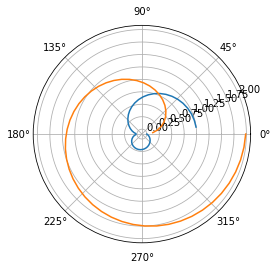

In [129]:
plt.polar(theta, r1)
plt.polar(theta, r2)

## Čačić 5


Napišite funkciju koja prima simboličku funkciju, integrira je simbolički po varijabli `x` (ako može), dobiveni rezultat derivira simbolički i uspoređuje s originalnim ulazom. Na kraju treba ispisati jednadžbe koje proizlaze iz integriranja odnosno deriviranja.

In [142]:
import sympy as sp
sp.init_printing()
x = sp.Symbol('x')
from IPython.display import display

def provjeri_integral(fja):
    integral = sp.Integral(fja, x)
    intfja = integral.doit()
    prva = sp.Eq(integral, intfja, evaluate=False)
    
    derivacija = sp.Derivative(intfja, x)
    derfja = derivacija.doit()
    druga = sp.Eq(derivacija, derfja, evaluate=False)
    
    if derfja == fja:
        print('Sintaksno su jednake')
    else:
        print('Nisu sintaksno jednake')

    display(prva)
    display(druga)

Nisu sintaksno jednake


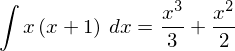

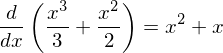

In [143]:
provjeri_integral(x*(x+1))

Sintaksno su jednake


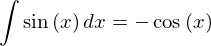

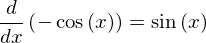

In [144]:
provjeri_integral(sp.sin(x))

Sintaksno su jednake


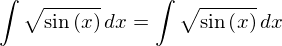

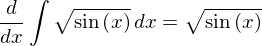

In [145]:
provjeri_integral(sp.sqrt(sp.sin(x)))

Domaća zadaća: pokušajte centrirati te dvije jednadžbe.
Ustanovite programski zna li sympy integrirati vašu funkciju.